# **Libraries installation**

In [6]:
!pip install neo4j langchain langchain-community torch transformers

# **Libraries import**

In [24]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import csv
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity
from langchain.embeddings import SentenceTransformerEmbeddings
from neo4j import GraphDatabase
from transformers import AutoModelForCausalLM, AutoTokenizer, pipeline

# **Data reading and random selection**

In [10]:
data = pd.read_pickle('/content/smart_app_data.pkl')

In [11]:
data

,time,asset_id,name,kpi,sum,avg,min,max
0,2024-03-01T00:00:00Z,ast-yhccl1zjue2t,Large Capacity Cutting Machine 1,working_time,0.000000,0.000000,0.0,0.000000
1,2024-03-01T00:00:00Z,ast-yhccl1zjue2t,Large Capacity Cutting Machine 1,idle_time,0.000000,0.000000,0.0,0.000000
2,2024-03-01T00:00:00Z,ast-yhccl1zjue2t,Large Capacity Cutting Machine 1,offline_time,0.000000,0.000000,0.0,0.000000
3,2024-03-01T00:00:00Z,ast-yhccl1zjue2t,Large Capacity Cutting Machine 1,consumption,0.066106,0.002321,0.0,0.066106
4,2024-03-01T00:00:00Z,ast-yhccl1zjue2t,Large Capacity Cutting Machine 1,power,NaN,0.003673,0.0,0.012801
...,...,...,...,...,...,...,...,...
96915,2024-10-19T00:00:00Z,ast-06kbod797nnp,Testing Machine 3,cost_idle,0.000000,0.000000,0.0,0.000000
96924,2024-10-19T00:00:00Z,ast-06kbod797nnp,Testing Machine 3,cycles,0.000000,0.000000,0.0,0.000000
96925,2024-10-19T00:00:00Z,ast-06kbod797nnp,Testing Machine 3,good_cycles,0.000000,0.000000,0.0,0.000000
96926,2024-10-19T00:00:00Z,ast-06kbod797nnp,Testing Machine 3,bad_cycles,0.000000,0.000000,0.0,0.000000


In [12]:
random_selection = data.sample(n=15, random_state=219)

In [13]:
random_selection

,time,asset_id,name,kpi,sum,avg,min,max
55643,2024-07-21T00:00:00Z,ast-anxkweo01vv2,Medium Capacity Cutting Machine 3,consumption,0.000000,0.000000,0.000,0.000
19402,2024-05-20T00:00:00Z,ast-xpimckaf3dlf,Laser Cutter,consumption_idle,0.000000,0.000000,0.000,0.000
19186,2024-05-11T00:00:00Z,ast-xpimckaf3dlf,Laser Cutter,bad_cycles,0.000000,0.000000,0.000,0.000
40274,2024-10-04T00:00:00Z,ast-nrd4vl07sffd,Testing Machine 1,working_time,0.000000,0.000000,0.000,0.000
10431,2024-08-27T00:00:00Z,ast-o8xtn5xa8y87,Riveting Machine,consumption_working,0.001000,0.001000,0.001,0.001
54813,2024-06-19T00:00:00Z,ast-anxkweo01vv2,Medium Capacity Cutting Machine 3,consumption_working,0.000333,0.000044,0.000,0.000
70517,2024-04-18T00:00:00Z,ast-upqd50xg79ir,Assembly Machine 2,consumption_working,0.000000,0.000000,0.000,0.000
56469,2024-08-21T00:00:00Z,ast-anxkweo01vv2,Medium Capacity Cutting Machine 3,good_cycles,0.000000,0.000000,0.000,0.000
76181,2024-04-14T00:00:00Z,ast-sfio4727eub0,Assembly Machine 3,idle_time,0.000000,0.000000,0.000,0.000
72204,2024-06-22T00:00:00Z,ast-upqd50xg79ir,Assembly Machine 2,offline_time,0.000000,0.000000,0.000,0.000


# **graph plotting**

In [ ]:
G = nx.DiGraph()

G.add_nodes_from(['Di Caprio','Reeves', 'Titanic', 'Matrix', 'Cameron', 'Wachowski', 'Sci-fi', 'Dramatic'])
G.add_edge('Di Caprio', 'Titanic', label = "Recita in")
G.add_edge('Reeves', 'Matrix', label = "Recita in")
G.add_edge('Cameron', 'Titanic', label = "Ha diretto")
G.add_edge('Wachowski', 'Matrix', label = "ha diretto")
G.add_edge('Dramatic', 'Titanic', label = "genere")
G.add_edge('Matrix', 'Sci-fi', label = "genere")

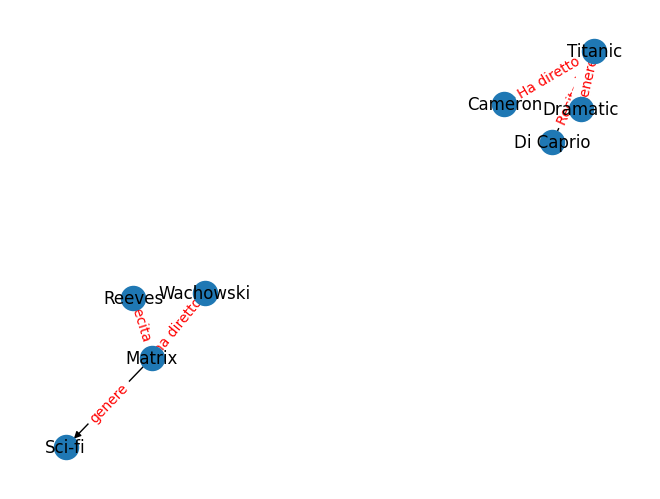

In [ ]:
pos = nx.spring_layout(G)
nx.draw(G, with_labels = True, pos = pos)
edge_labels = nx.get_edge_attributes(G, 'label')  # Retrieve edge labels
nx.draw_networkx_edge_labels(G, pos = pos, edge_labels=edge_labels, font_color='red')
plt.show()

# **neo4j connection**

In [8]:
class Neo4jConnection:
    def __init__(self, uri, user, password):
        try:
            self.driver = GraphDatabase.driver(uri, auth=(user, password))
            print("Connected to Neo4j successfully.")
        except Exception as e:
            print(f"Failed to connect to Neo4j: {e}")

    def close(self):
        if hasattr(self, 'driver'):
            self.driver.close()
            print("Connection closed.")

    def run_query(self, query, parameters=None):
        with self.driver.session() as session:
            result = session.run(query, parameters)
            return [record.data() for record in result]

    def insert_machines(self, machines_df):
        with self.driver.session() as session:
            for _, row in machines_df.iterrows():
                session.run("""
                    MERGE (m:Machine {asset_id: $asset_id})
                    SET m.name = $name
                    """,
                    asset_id=row['asset_id'], name=row['name'])

    def insert_kpis(self, kpis_df):
        with self.driver.session() as session:
            for _, row in kpis_df.iterrows():
                session.run("""
                    MATCH (m:Machine {asset_id: $asset_id})
                    CREATE (k:KPI {kpi: $kpi, sum: $sum, avg: $avg, min: $min, max: $max, time: $time})
                    CREATE (m)-[:HAS_KPI]->(k)
                    """,
                    asset_id=row['asset_id'], kpi=row['kpi'], sum=row['sum'], avg=row['avg'],
                    min=row['min'], max=row['max'], time=row['time'])

    def delete_all_data(self):
      with self.driver.session() as session:
        session.run("MATCH (n) DETACH DELETE n")
        print("All data deleted.")

    def export_to_csv(self, query, csv_file_path):
      with self.driver.session() as session:
        results = session.run(query)

        # Check if there are results
        results_list = [record.data() for record in results]
        if not results_list:
            print("No data returned by the query.")
            return

        # Extract field names
        fieldnames = results_list[0].keys()

        # Write to CSV if data is available
        with open(csv_file_path, mode='w', newline='') as csv_file:
            writer = csv.DictWriter(csv_file, fieldnames=fieldnames)
            writer.writeheader()
            writer.writerows(results_list)



conn = Neo4jConnection(uri="bolt://44.203.76.49:7687",
                       user="neo4j",
                       password="saps-record-prism")

Connected to Neo4j successfully.


# Populate the database

In [14]:
db_machine = random_selection[['asset_id', 'name']]
db_kpis = random_selection[['asset_id','kpi', 'sum', 'avg', 'min', 'max', 'time']]

In [15]:
db_machine.name.unique()

array(['Medium Capacity Cutting Machine 3', 'Laser Cutter',
       'Testing Machine 1', 'Riveting Machine', 'Assembly Machine 2',
       'Assembly Machine 3', 'Laser Welding Machine 2',
       'Low Capacity Cutting Machine 1'], dtype=object)

In [18]:
conn.insert_machines(db_machine)
conn.insert_kpis(db_kpis)

# Do not execute the below cell, otherwise it deletes the data

In [17]:
conn.delete_all_data()

All data deleted.


# Do not execute the below cell, otherwise it shut down the connection to the database

In [ ]:
conn.close()

Connection closed.


# **Queries**

# Retrieve all machines with name and asset_id

In [19]:
machines_query = "MATCH (m:Machine) RETURN m.name AS machine_name, m.asset_id AS asset_id"
machines = conn.run_query(machines_query)
for m in machines:
  print(m)

{'machine_name': 'Medium Capacity Cutting Machine 3', 'asset_id': 'ast-anxkweo01vv2'}
{'machine_name': 'Laser Cutter', 'asset_id': 'ast-xpimckaf3dlf'}
{'machine_name': 'Testing Machine 1', 'asset_id': 'ast-nrd4vl07sffd'}
{'machine_name': 'Riveting Machine', 'asset_id': 'ast-o8xtn5xa8y87'}
{'machine_name': 'Assembly Machine 2', 'asset_id': 'ast-upqd50xg79ir'}
{'machine_name': 'Assembly Machine 3', 'asset_id': 'ast-sfio4727eub0'}
{'machine_name': 'Laser Welding Machine 2', 'asset_id': 'ast-206phi0b9v6p'}
{'machine_name': 'Low Capacity Cutting Machine 1', 'asset_id': 'ast-6nv7viesiao7'}


# Retrieve all the data and save them in a .csv file

In [40]:
csv_query = """
MATCH (m:Machine)-[r:HAS_KPI]->(k:KPI)
RETURN
    k.time AS time,
    m.asset_id AS asset_id,
    m.name AS name,
    k.kpi AS kpi,
    k.sum AS sum,
    k.avg AS avg,
    k.min AS min,
    k.max AS max
"""
conn.export_to_csv(csv_query, "neo4j_export.csv")

Query results: [{'time': '2024-07-21T00:00:00Z', 'asset_id': 'ast-anxkweo01vv2', 'name': 'Medium Capacity Cutting Machine 3', 'kpi': 'consumption', 'sum': 0.0, 'avg': 0.0, 'min': 0.0, 'max': 0.0}, {'time': '2024-06-19T00:00:00Z', 'asset_id': 'ast-anxkweo01vv2', 'name': 'Medium Capacity Cutting Machine 3', 'kpi': 'consumption_working', 'sum': 0.00033278161810383725, 'avg': 4.4350039828370284e-05, 'min': 0.0, 'max': 0.0}, {'time': '2024-08-21T00:00:00Z', 'asset_id': 'ast-anxkweo01vv2', 'name': 'Medium Capacity Cutting Machine 3', 'kpi': 'good_cycles', 'sum': 0.0, 'avg': 0.0, 'min': 0.0, 'max': 0.0}, {'time': '2024-05-20T00:00:00Z', 'asset_id': 'ast-xpimckaf3dlf', 'name': 'Laser Cutter', 'kpi': 'consumption_idle', 'sum': 0.0, 'avg': 0.0, 'min': 0.0, 'max': 0.0}, {'time': '2024-05-11T00:00:00Z', 'asset_id': 'ast-xpimckaf3dlf', 'name': 'Laser Cutter', 'kpi': 'bad_cycles', 'sum': 0.0, 'avg': 0.0, 'min': 0.0, 'max': 0.0}, {'time': '2024-10-04T00:00:00Z', 'asset_id': 'ast-nrd4vl07sffd', 'name'

# Retrieve KPIs associated to every machine and their values

In [22]:
kpi_query = """
MATCH (m:Machine {asset_id: $asset_id})-[:HAS_KPI]->(k:KPI)
RETURN k.kpi AS kpi, k.sum AS sum, k.avg AS avg, k.min AS min, k.max AS max
"""
kpis = conn.run_query(kpi_query, parameters={'asset_id': 'ast-o8xtn5xa8y87'})
for k in kpis:
  print(k)

{'kpi': 'consumption_working', 'sum': 0.001, 'avg': 0.001, 'min': 0.001, 'max': 0.001}
{'kpi': 'offline_time', 'sum': 0.0, 'avg': 0.0, 'min': 0.0, 'max': 0.0}


# **Retrieval**

# Generative model

In [23]:
model_name = "gpt2"
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModelForCausalLM.from_pretrained(model_name)

tokenizer_config.json:   0%|          | 0.00/26.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/665 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/1.04M [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


model.safetensors:   0%|          | 0.00/548M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/124 [00:00<?, ?B/s]

# Langchain manager (original version)

In [36]:
class LangChainManager_original:

    def __init__(self, conn: Neo4jConnection):
        self.conn = conn
        self.llm = pipeline("text-generation", model="gpt2")

    def retrieve_and_respond(self, query):

        data = self.conn.run_query(query)

        data_text = "\n".join(str(record) for record in data)

        prompt = (
            f"Please summarize and translate this query into natural language: '{query}'. "
            f"Based on that, here's what I found:\n{data_text}\n"
        )


        response = self.llm(prompt, max_new_tokens=150)  # Adjust token limit as needed

        return response[0]['generated_text']

lc = LangChainManager_original(conn)

# Langchain manager (new version)

In [34]:
class LangChainManager:
    def __init__(self, conn: Neo4jConnection):
        self.conn = conn
        self.llm = pipeline("text-generation", model="gpt2")
        self.embedding_model = SentenceTransformerEmbeddings(model_name="all-MiniLM-L6-v2")

    def retrieve_and_respond(self, query):
        # Crea embedding della query
        query_embedding = self.embedding_model.embed_query(query)  # Assicurati che sia 2D

        # Recupera i nodi e i relativi embedding da Neo4j
        data = self.conn.run_query("MATCH (d:Document) RETURN d.text AS text, d.embedding AS embedding")

        documents = []
        embeddings = []
        for record in data:
            documents.append(record["text"])
            embeddings.append(record["embedding"])

        if not embeddings:  # Controlla se ci sono embedding
            return "Nessun documento trovato."

        embeddings = np.array(embeddings)  # Converti in array NumPy
        if embeddings.ndim == 1:  # Assicurati che sia 2D
            embeddings = embeddings.reshape(1, -1)

        # Calcola similarità
        similarities = cosine_similarity(query_embedding, embeddings)
        similar_docs_indices = np.argsort(similarities[0])[::-1][:5]  # Prendi i 5 documenti più simili

        # Recupera nodi simili e i collegamenti
        similar_docs = [documents[i] for i in similar_docs_indices]
        expanded_context = ""
        for i in similar_docs_indices:
            related_nodes = self.conn.run_query(f"""
                MATCH (d:Document {{text: $text}})-[:RELATED]->(related)
                RETURN related.text AS related_text
            """, text=documents[i])

            expanded_context += "\n".join([doc["related_text"] for doc in related_nodes])

        # Prompt per il modello di generazione
        prompt = (
            f"Please summarize and translate this query into natural language: '{query}'. "
            f"Here's what I found based on the query and related context:\n{expanded_context}\n"
        )

        response = self.llm(prompt, max_new_tokens=150)
        return response[0]['generated_text']

lc = LangChainManager(conn)

/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


In [37]:
query = """
MATCH (m:Machine)-[:HAS_KPI]->(k:KPI)
RETURN m.asset_id AS asset_id, m.name AS name, k.kpi AS kpi, k.sum AS sum, k.avg AS avg
LIMIT 5
"""

response = lc.retrieve_and_respond(query)
print(response)

Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Please summarize and translate this query into natural language: '
MATCH (m:Machine)-[:HAS_KPI]->(k:KPI)
RETURN m.asset_id AS asset_id, m.name AS name, k.kpi AS kpi, k.sum AS sum, k.avg AS avg
LIMIT 5
'. Based on that, here's what I found:
{'asset_id': 'ast-anxkweo01vv2', 'name': 'Medium Capacity Cutting Machine 3', 'kpi': 'consumption', 'sum': 0.0, 'avg': 0.0}
{'asset_id': 'ast-anxkweo01vv2', 'name': 'Medium Capacity Cutting Machine 3', 'kpi': 'consumption_working', 'sum': 0.00033278161810383725, 'avg': 4.4350039828370284e-05}
{'asset_id': 'ast-anxkweo01vv2', 'name': 'Medium Capacity Cutting Machine 3', 'kpi': 'good_cycles', 'sum': 0.0, 'avg': 0.0}
{'asset_id': 'ast-xpimckaf3dlf', 'name': 'Laser Cutter', 'kpi': 'consumption_idle', 'sum': 0.0, 'avg': 0.0}
{'asset_id': 'ast-xpimckaf3dlf', 'name': 'Laser Cutter', 'kpi': 'bad_cycles', 'sum': 0.0, 'avg': 0.0}
{'asset_id': 'ast-xpimckaf3dlf', 'name': 'Laser Cutter (Cape of Angels)", 'kpi': 'good_cycles_calculated','sum': 0.0, 'avg': 0.0}
I 